[View in Colaboratory](https://colab.research.google.com/github/kaushik9728/ML-28th-May/blob/master/PCA.ipynb)

## We Will Perform Principle Component Analysis on The MNIST analysis

 scikit-learn library comes with a few small datasets that do not require to download from any external website. and MNIST is one of them

**Imports**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## This Code Will Load The Digits Dataset

In [0]:
from sklearn.datasets import load_digits

In [0]:
digits=load_digits()

*We'll store features ( 8 x 8 pixel information of each handwritten digit image) into X, a numpy array and target (denoting the digit) into y, also a numpy array*

In [0]:
X = digits.data

In [0]:
y = digits.target

In [7]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


**Now We Will Print Some Images  Of The Digits Stored Under data.images[] **

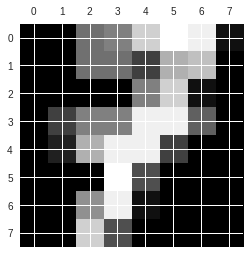

In [8]:
plt.gray()
plt.matshow(digits.images[7])
plt.show()

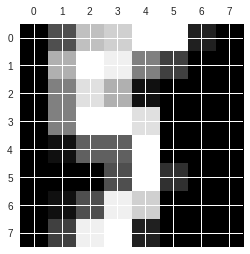

In [9]:
plt.gray()
plt.matshow(digits.images[15])
plt.show()

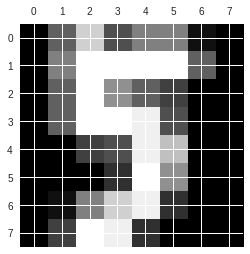

In [10]:
plt.gray()
plt.matshow(digits.images[33])
plt.show()

**Train Test Split**

In [0]:
from sklearn.preprocessing import StandardScaler

**Standardising the features**

In [0]:
X=StandardScaler().fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca=PCA(n_components=.95)

In [0]:
principalComponents=pca.fit_transform(X)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log = LogisticRegression()

In [22]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
predictions = log.predict(X_test)

In [24]:
score = log.score(X_test, y_test)
score

0.9513212795549374

In [0]:
import sklearn.metrics as met

**Now lets Evaluate Our Model**

In [26]:
predprob = log.predict_proba(X_test)
logLoss = met.log_loss(y_test, predprob)
print('Log loss: '+str(logLoss))

Log loss: 0.2478509060222549


In [27]:
print('Accuracy Score: ')
met.accuracy_score(y_test, predictions)

Accuracy Score: 


0.9513212795549374

In [28]:
cm = met.confusion_matrix(y_test, predictions)
print('Confusion Matrix')
cm

Confusion Matrix


array([[73,  0,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0, 71,  0,  1,  0,  0,  1,  0,  2,  4],
       [ 0,  0, 71,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 72,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 75,  0,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  0, 67,  1,  1,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 75,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 70,  0,  2],
       [ 0,  4,  0,  2,  0,  0,  1,  0, 52,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  1, 58]])

In [29]:
print('Classification Report: ')
cr = met.classification_report(y_test, predictions)
print(cr)

Classification Report: 
             precision    recall  f1-score   support

          0       1.00      0.97      0.99        75
          1       0.95      0.90      0.92        79
          2       1.00      0.99      0.99        72
          3       0.96      0.99      0.97        73
          4       1.00      0.95      0.97        79
          5       1.00      0.93      0.96        72
          6       0.95      0.99      0.97        76
          7       0.92      0.97      0.95        72
          8       0.88      0.87      0.87        60
          9       0.84      0.95      0.89        61

avg / total       0.95      0.95      0.95       719

